# PCA

MNIST dataset downloaded from Kaggle : 
https://www.kaggle.com/c/digit-recognizer/data

In [4]:
#Loading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mnist_data = pd.read_csv('train.csv')

In [6]:
mnist_data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y = mnist_data['label']
X = mnist_data.drop('label', axis=1)

In [8]:
print(y.shape)
print(X.shape)

(42000,)
(42000, 784)


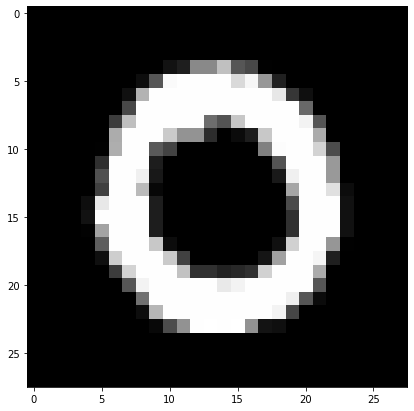

0


In [9]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 1

grid_data = X.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(y[idx])

## 2D Visualization using PCA

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(42000, 784)


In [12]:
covar_matrix = np.matmul(standardized_data.T, standardized_data)
print('shape of covariance matrix is : {}'.format(covar_matrix.shape))

shape of covariance matrix is : (784, 784)


In [13]:
from scipy.linalg import eigh

values, vectors = eigh(covar_matrix, eigvals = (782, 783))

print('Shape of eigen vector = {}'.format(vectors.shape))
vectors = vectors.T
print('Updated shape of eigen vector = {}'.format(vectors.shape))

Shape of eigen vector = (784, 2)
Updated shape of eigen vector = (2, 784)


In [32]:
new_coordinates = np.matmul(vectors, standardized_data.T)

print('resultant new data points shape: {} X {} = {}'.format(vectors.shape, standardized_data.T.shape, new_coordinates.shape))

resultant new data points shape: (2, 784) X (784, 42000) = (2, 42000)


In [33]:
new_coordinates = np.vstack((new_coordinates, y)).T

data_frame = pd.DataFrame(data = new_coordinates, columns=('2nd principal', '1st principal', 'label'))
data_frame.head()

,2nd principal,1st principal,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


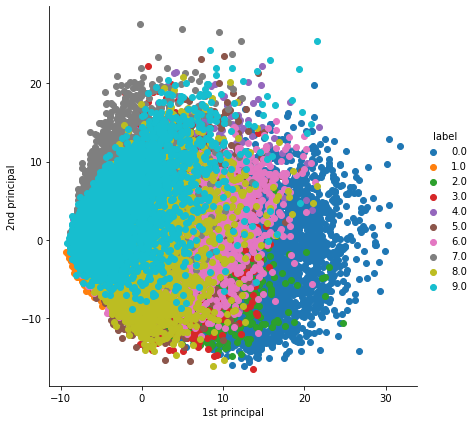

In [34]:
import seaborn as sns

sns.FacetGrid(data_frame, hue = 'label', height = 6) \
.map(plt.scatter, '1st principal', '2nd principal') \
.add_legend() 

plt.show()

## PCA using Scikit-Learn

In [24]:
from  sklearn import decomposition


In [26]:
pca = decomposition.PCA()

pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

pca_data.shape

(42000, 2)

In [29]:
pca_data = np.vstack((pca_data.T, y)).T

pca_df = pd.DataFrame(data = pca_data, columns=('1st principal', '2nd principal', 'label'))

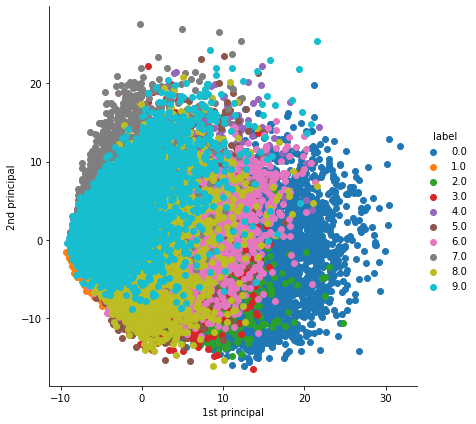

In [30]:
sns.FacetGrid(pca_df, hue = 'label', height = 6) \
.map(plt.scatter, '1st principal', '2nd principal') \
.add_legend() 

plt.show()